Please refer to files Verlet_s_orbitals and p_orbitals_1 for detailed explanation of Verlet method. 

Now that we have the Verlet integrator function, we can use it in the shooting/bisection method. 
  
Flowchart for the shooting/bisection method:
1. Set an initial guess for the eigenvalue E called E1
2. Set a value called called E2 (for Bisection purposes)
3. Set a dE variable to modify E, where E2 = E1 + dE
4. Calculate f with the initial E1 guess
5. Define delta_0 as the difference between f and required condition at the last index
6. Calculate f again but with E2 guess
7. Define delta_2 as the difference between this f and required condition at the last index
8. If delta_2 is within the tolerance E2 is the answer; break
9. If delta_0 and delta_2 have different signs, bisect
10. E = (E1 + E2)/2 
11. Run Verlet to calculate f again
12. Repeat from step 6
13. If delta_0 and delta_2 have the same sign, then assign E1 = E2 and increment E2 by dE
14. Can check for edge cases along the way

Before, we worked on the Schrodinger equation for hydrogen:  
  
\begin{equation}
\frac{1}{r}\frac{d^2}{dr^2}(r\psi) = \frac{2m}{\hbar^2}(-E + V(r))\psi \\
\end{equation}

  
where V(r) = $- \frac{e^2}{r}$  
  
Now for excitons, the proposed Puls potential is:   
\begin{equation}
V(r) = \frac{-e^2}{\epsilon_0r_h}[1 - 2e^\frac{-2r_h}{a_e}(1+\frac{r_h}{a_e})] \\
\end{equation}
  
After the following assumptions and substitutions:  
  
\begin{equation}
\rho_h = \frac{r_h}{a_A}
\end{equation}

\begin{equation}
a_A = \frac{\hbar^2}{m_h^2}
\end{equation}

\begin{equation}
a_D = \frac{\hbar^2}{m_e^2}
\end{equation}

\begin{equation}
a_e = K a_D
\end{equation}

\begin{equation}
Ry_h = \frac{m_h e^4}{2\hbar^2}  
\end{equation}

\begin{equation}
Ry_e = \frac{m_e e^4}{2\hbar^2}  
\end{equation}

\begin{equation}
\epsilon_0 = 1
\end{equation}
    
  
The Puls Potential becomes (in Rydberg units):  
\begin{equation}
V(\rho_h) = \frac{-2}{\rho_h}[1 - 2e^{-2\rho_h a_h/a_e}(1+\rho_h a_h/a_e)] \\
\end{equation}

**************************n =  1  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.46099311852456204 !!!!!!!!!!!!!!!


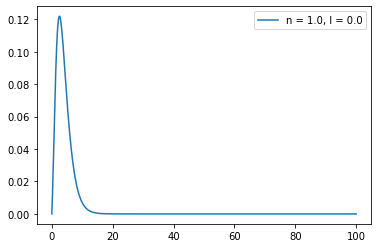

**************************n =  2  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.1656481630077466 !!!!!!!!!!!!!!!


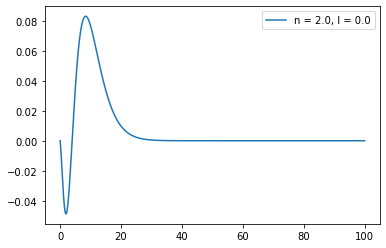

**************************n =  3  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.08383909765292245 !!!!!!!!!!!!!!!


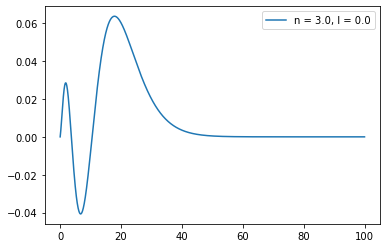

**************************n =  4  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.0504393505067928 !!!!!!!!!!!!!!!


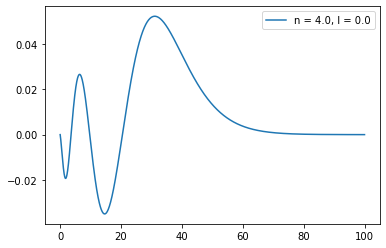

**************************n =  5  l =  0 ***************************************
bisection next step
EigenEnergy is  -0.0336362456760509 !!!!!!!!!!!!!!!


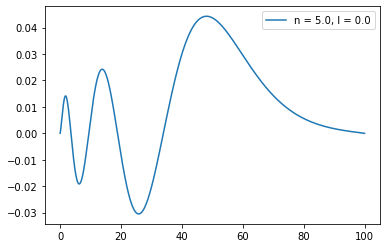

**************************n =  1  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.23061423816905469 !!!!!!!!!!!!!!!


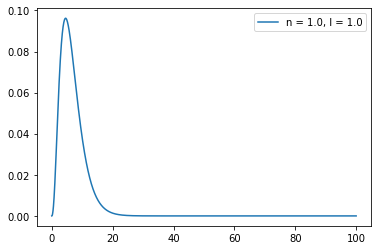

**************************n =  2  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.10476764646283081 !!!!!!!!!!!!!!!


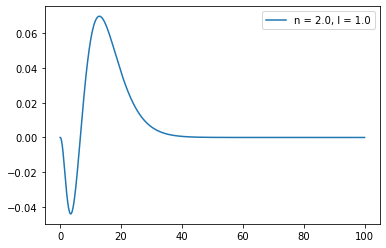

**************************n =  3  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.05971764525525558 !!!!!!!!!!!!!!!


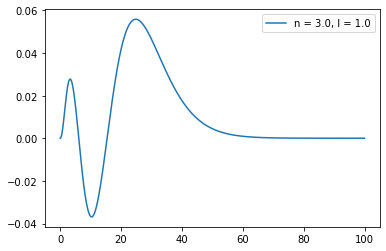

**************************n =  4  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.03854354452019469 !!!!!!!!!!!!!!!


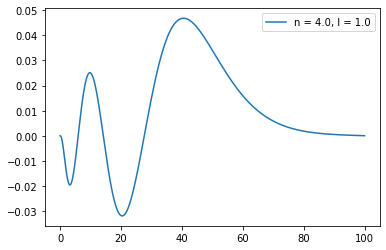

**************************n =  5  l =  1 ***************************************
bisection next step
EigenEnergy is  -0.026868644959027913 !!!!!!!!!!!!!!!


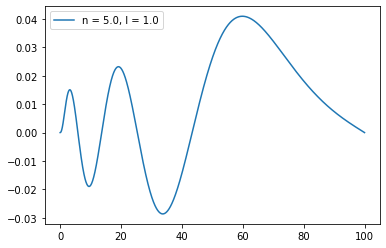

**************************n =  1  l =  2 ***************************************
bisection next step
EigenEnergy is  -0.11076489021249594 !!!!!!!!!!!!!!!


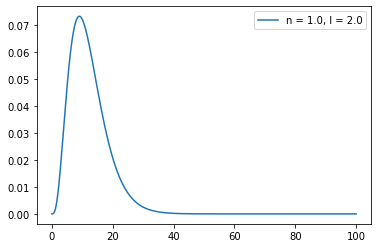

**************************n =  2  l =  2 ***************************************
bisection next step
EigenEnergy is  -0.06229301510898179 !!!!!!!!!!!!!!!


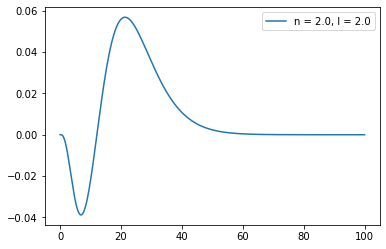

**************************n =  3  l =  2 ***************************************
bisection next step
EigenEnergy is  -0.039875499037330626 !!!!!!!!!!!!!!!


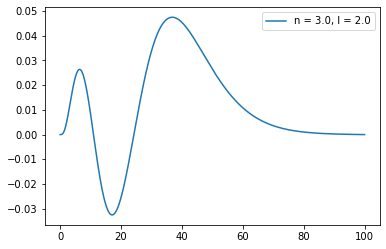

**************************n =  4  l =  2 ***************************************
bisection next step
EigenEnergy is  -0.02767335731978158 !!!!!!!!!!!!!!!


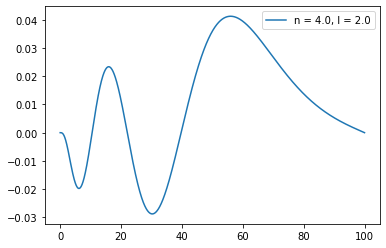

**************************n =  5  l =  2 ***************************************
bisection next step
EigenEnergy is  -0.01943566389942875 !!!!!!!!!!!!!!!


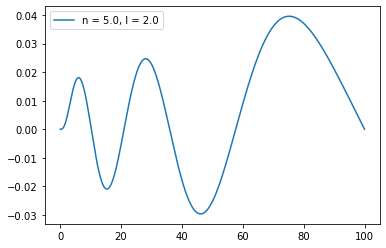

In [105]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
# Alias scipy as sp
import scipy as sp
# scipy.optimize for the curve_fit function
import scipy.optimize
import math

# define rho
totrho = 2000
rho_min = 0
rho_max = 100
rho = np.linspace(rho_min, rho_max, totrho)

def PulsV(r):
    a0 = 1
    return -2/r*(1-2*np.exp(-2*r/a0)*(1+r/a0))

def Verlet(epsilon, l):
    # defining rho range
    totrho = 2000
    rho_min = 0
    rho_max = 100
    rho = np.linspace(rho_min, rho_max, totrho)
    drho = (rho_max)/(totrho)
    
    # initialize a zero list of the wavefunction of length rho
    length = totrho
    f = [0]*length
   
    # set the end values of f; mind the indexing 
    f[length - 1] = 0
    f[length - 2] = 10**-10
    
    for i in range(length-2, 0, -1):
        f[i-1] = 2*f[i] - f[i+1] + drho**2*(-epsilon + PulsV(rho[i]) + l*(l+1)/(rho[i]**2))*f[i]
    
    A = sum([x**2 for x in f])
    f = f/np.sqrt(A)
    return f # rho*psi 

# From Feynman's hydrogen lecture + Molecular symmetries by David Willock
def theory(n, l):
    totrho = 2000
    rho_min = 0
    rho_max = 100
    rho = np.linspace(rho_min, rho_max, totrho)
    
    if l == 0:
        # coefficients in front of rho
        a = [0]*n
        a[0] = 1
        for i in range(1, n, 1):
            k = i
            a[i] = 2*(k/n -1)/(k*(k+1))*a[i-1]
    
        # multiply element-wise by rho^k
        g = [0]*totrho
        for i in range(totrho):
            for k in range(n):
                g[i] += a[k]*rho[i]**(k+1)
        # calculating psi
        psi = np.exp(-rho[1::]/n)/rho[1::]*g[1::]
                
    if l == 1:
        if n == 2:
            psi = rho*np.exp(-rho/n)
        elif n == 3:
            psi = (4-2/n*rho)*(2/n)*rho*np.exp(-rho/n)
    elif l == 2:
        psi = 1/n**2*rho**2*np.exp(-rho/n)

    A = sum([x**2 for x in psi])
    psi_n = [x/np.sqrt(A) for x in psi]
    return psi_n

# Begin main - Shooting/Bisection

# Allocate variable to hold solution

En = [0]*15
f_nl = [[0 for x in range(totrho)] for y in range(15)] 

# Allocate variable to hold the difference between solution and BC
delta = [0]*2

# Define initial guess and increments
E1 = -1.1 
dE = 0.001
E2 = E1 + dE

# Define boundary condition 
BC_0 = 0

# Define tolerances
tolerance_min = 10**-10

# set up boolean 
Bisecting = False

# keeping track of the number of solutions
count = 0 

for l in range(3):
    
    for n in range(5):
        n += 1
        
        # Calculate the wavefunction with initial guess
        f = Verlet(E1, l)
        
        # Define the difference between required BC and our extrapolated BC
        delta[0] = f[0] - BC_0
        print('**************************n = ', n, ' l = ', l, '***************************************')

        for i in range(10**6):
    
            #print('****** iteration', i)
            #print('n = ', n, ' l = ', l)
            
            # set up for E variables for iterations (incrementing energies)
            if not Bisecting:
                E = E2
                
            if Bisecting:
                E = 0.5*(E1 + E2)
                #print('Bisecting') 
            
            #if n == 5 and l == 2:
                #print('E1, E2, and E are:')
                #print(E1, E2, E)
            # Calculate the wavefunction again with E2
            f = Verlet(E, l)
            
            # Define the difference between required BC and second extrapolated BC
            delta[1] = f[0] - BC_0
    
            #if n == 5 and l == 2:
                #print('delta[0] and delta[1] are:')
                #print(delta[0], delta[1])
    
            if abs(delta[1]) < tolerance_min: # found answer
                count += 1
                En[count-1] = E
                f_nl[count-1][:] = f
                print('EigenEnergy is ', En[count-1], '!!!!!!!!!!!!!!!')
                plt.plot(rho, f_nl[count-1][:], label = 'n = %.1f, l = %.1f' %(n, l))
                plt.legend()
                plt.show()
                
                # prepare the E for the next energy eigenvalue
                if n != 5: # keeping the same l
                    E1 = E + dE/1000
                    E2 = E1 + dE
                    
                #if n == 4 and l == 2:
                    #E1 = E
                    #E2 = E1 + 0.00001
                
                if n == 5: # going onto next n, reseting E1 back to starting guess
                    E1 = -1.1
                    E2 = E1 + dE

                
                # prepare boolean and continue iterative setup 
                Bisecting = False 
                break    
        
    
            # Determine how to increment E in each case
         
            # If the last step was already a bisection (the next step will be too): change the energy variables
            if Bisecting:
                if delta[0]*delta[1] > 0: # depends on which variable was the last to move
                    if E2_moved == True:
                        E2 = E
                    else: 
                        E1 = E
                        E2_moved = False
                else:
                    if E2_moved == True:
                        E1 = E
                        E2_moved = False
                    else: 
                        E2 = E
                        E2_moved = True
    
            # If the last step was not a bisection but the next one requires one
            if not Bisecting and delta[0]*delta[1] < 0:
                Bisecting = True
                E2 = E # will do first bisection at the beginning of the next iteration
                E2_moved = True
                print('bisection next step')
        
            # Turn Bisecting boolean to true if the two deltas straddle 0 
        
            if not Bisecting:
                E1 = E2
                E2 += dE
                #if n == 5 and l == 2:
                    #print('no bisection')
        
            if i == 10**6:
                print('Max iterations reached, please change your initial guess.')
                break
    
            if E >= 0:
                print('No solution found - Solution greater than zero')
                
    
        
            # switch over the values to keep up with the energy steps
            delta[0] = delta[1]    
            #print("                    ")
    


Flowchart for the shooting/bisection method:
1. Set an initial guess for the eigenvalue E called E1
2. Set a value called called E2 (for Bisection purposes)
3. Set a dE variable to modify E, where E2 = E1 + dE
4. Calculate f with the initial E1 guess
5. Define delta_0 as the difference between f and required condition at the last index (after extrapolating)
6. Calculate f again but with E2 guess
7. Define delta_2 as the difference between this f and required condition at the last index
8. If delta_2 is within the tolerance E2 is the answer; break
9. If delta_0 and delta_2 have different signs, bisect
10. E = (E1 + E2)/2 
11. Run Verlet to calculate f again
12. Repeat from step 6
13. If delta_0 and delta_2 have the same sign, then assign E1 = E2 and increment E2 by dE
14. Can check for edge cases along the way

In [106]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Table(header=dict(values=['1st quantum number n', '2nd quantum number l', 'EigenEnergy']),
                 cells=dict(values=[['1', '2', '3', '4', '5', '1', '2', '3', '4', '5', '1', '2', '3', '4', '5',],
                                    ['0', '' ,'' ,'' ,'' , '1','' ,'' ,'' ,'' , '2','' ,'' ,'' ,'' ],
                                    [En[0], En[1], En[2], En[3], En[4], En[5], En[6], En[7], En[8], En[9], En[10], En[11], En[12], En[13], En[14]]]
                                    ))])
fig.show()

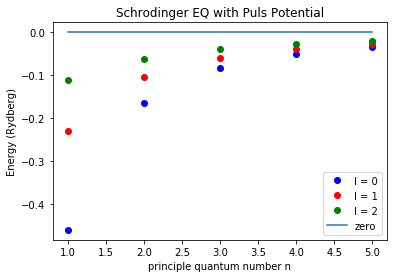

In [107]:
a = list(range(15))
n = [x+1 for x in a]

plt.plot(n[0:5], En[0:5], 'o', label = 'l = 0', color = 'b')
plt.plot(n[0:5], En[5:10], 'o', label = 'l = 1', color = 'r')
plt.plot(n[0:5], En[10:15], 'o', label = 'l = 2', color = 'g')
plt.plot(n[0:5], [0]*5, label = 'zero')
plt.xlabel("principle quantum number n")
plt.ylabel('Energy (Rydberg)')
plt.title('Schrodinger EQ with Puls Potential')
plt.legend()
plt.show()

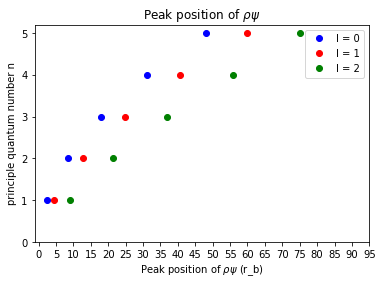

In [108]:
fMax_index = [0]*15
for i in range(15):
    fMax = max(f_nl[i][:])
    fMax_index[i] = f_nl[i][:].index(fMax)
fMax_index = [x/2000*100 for x in fMax_index]  

plt.plot(fMax_index[0:5], n[0:5], 'o', label = 'l = 0', color = 'b')
plt.plot(fMax_index[5:10], n[0:5], 'o', label = 'l = 1', color = 'r')
plt.plot(fMax_index[10:15], n[0:5], 'o', label = 'l = 2', color = 'g')
plt.ylabel("principle quantum number n")
plt.xlabel('Peak position of $\\rho\psi$ (r_b)')
plt.title('Peak position of $\\rho\psi$')
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 5.5, 1))
plt.legend()
plt.show()

****** The minimum of the Puls Potential is (in r_b)  1.35


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in true_divide

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in true_divide



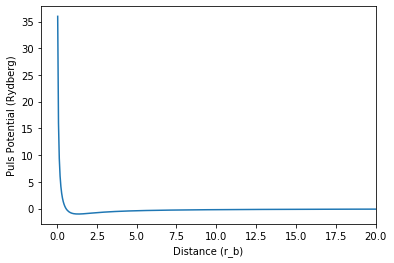

In [109]:
plt.plot(rho, PulsV(rho))
plt.xlim(-1, 20)
plt.ylabel("Puls Potential (Rydberg)")
plt.xlabel('Distance (r_b)')
Puls_list = PulsV(rho).tolist()
Puls_min = min(Puls_list[1::])
print('****** The minimum of the Puls Potential is (in r_b) ', Puls_list.index(Puls_min)/2000*100)

In [154]:
import pandas as pd

name_dict = En

df = pd.DataFrame(name_dict)
df.style.hide_index()
print(df)
df.to_csv('PulsPotential2', index = False)
print(df.to_csv(sep='\t', index=False))

           0
0  -0.460993
1  -0.165648
2  -0.083839
3  -0.050439
4  -0.033636
5  -0.230614
6  -0.104768
7  -0.059718
8  -0.038544
9  -0.026869
10 -0.110765
11 -0.062293
12 -0.039875
13 -0.027673
14 -0.019436
0
-0.46099311852456204
-0.1656481630077466
-0.08383909765292245
-0.0504393505067928
-0.0336362456760509
-0.23061423816905469
-0.10476764646283081
-0.05971764525525558
-0.03854354452019469
-0.026868644959027913
-0.11076489021249594
-0.06229301510898179
-0.039875499037330626
-0.02767335731978158
-0.01943566389942875

